<a href="https://colab.research.google.com/github/Tiklu01/carPricePredictionLinearRegression/blob/main/OutliersRemovedmodifiedCarsPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load data from CSV file
df = pd.read_csv('used_cars.csv')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [ ]:
#removing outliers
df['price'] = df['price'].astype(str).apply(lambda x: int(x.replace('$', '').replace(',', '')))
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,349950
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,53900
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,90998
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,62999


In [ ]:
print(type(df['milage'][0]))
df['milage'] = df['milage'].apply(lambda x: int(x.replace(',', '').split()[0]))
type(df['milage'][0])

<class 'str'>


numpy.int64

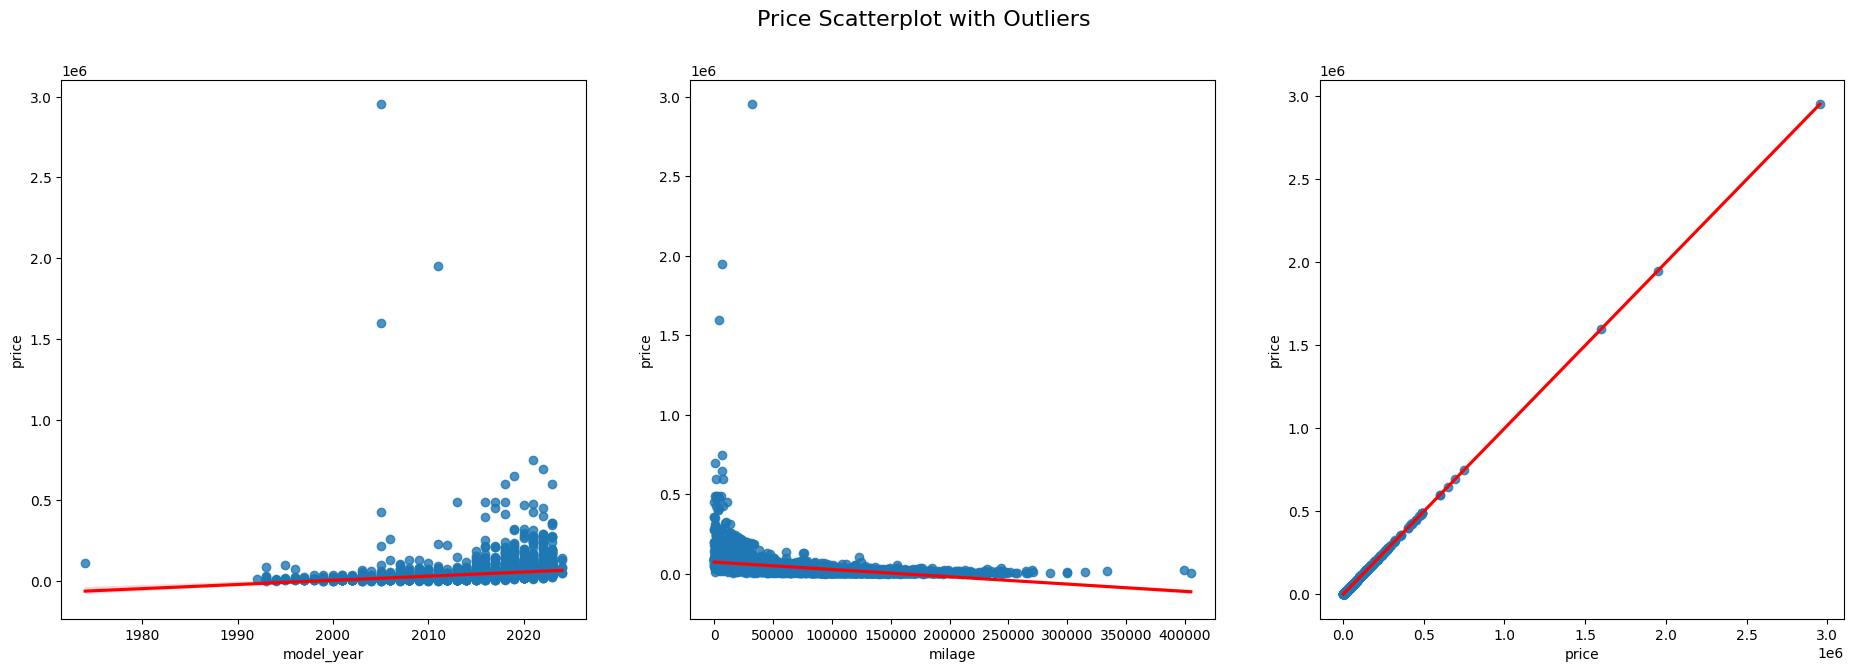

In [ ]:
numerical_cols = ['model_year', 'milage', 'price']

# Plotting our graphs all in one
fig, axes = plt.subplots(1, 3, figsize=(23, 7))  # Create a 1x3 grid (3 plots)

for i in range(len(numerical_cols)):
    sns.regplot(x=numerical_cols[i], y='price', data=df, ax=axes[i], line_kws={'color': 'red'})

fig.suptitle('Price Scatterplot with Outliers', fontsize=16)
plt.show()

In [ ]:
# Helper function to eliminate outliers and filter out negative values
def eliminate_outliers(df, col):
    df = df[df[col] >= 0]  # Remove negative values
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]


# Apply the function to the 'price' and 'milage' columns
df = eliminate_outliers(df, 'price')
df = eliminate_outliers(df, 'milage')

# Display the cleaned dataframe
df


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999
...,...,...,...,...,...,...,...,...,...,...,...,...
4003,Mercedes-Benz,E-Class E 300 4MATIC,2018,53705,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Black,At least 1 accident or damage reported,Yes,25900
4005,Audi,S4 3.0T Premium Plus,2022,10900,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,53900
4006,Porsche,Taycan,2022,2116,NaN,Electric,Automatic,Black,Black,None reported,NaN,90998
4007,Ford,F-150 Raptor,2020,33000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,62999


In [ ]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

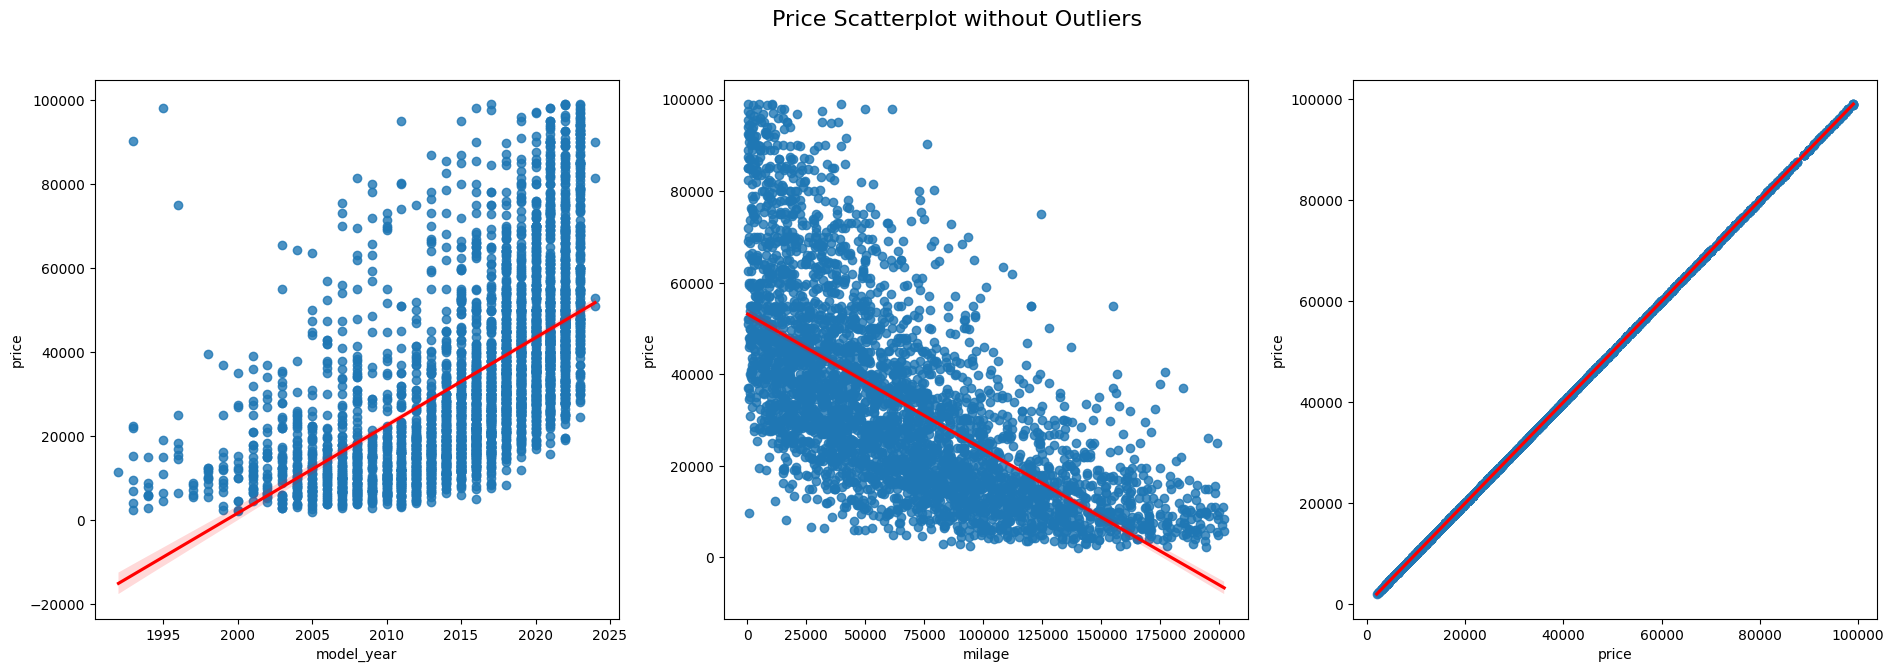

In [ ]:
numerical_cols = ['model_year', 'milage', 'price']

# Plotting our graphs all in one
fig, axes = plt.subplots(1, 3, figsize=(23, 7))  # Create a 1x3 grid (3 plots)

for i in range(len(numerical_cols)):
    sns.regplot(x=numerical_cols[i], y='price', data=df, ax=axes[i], line_kws={'color': 'red'})

fig.suptitle('Price Scatterplot without Outliers', fontsize=16)
plt.show()

In [ ]:

# Assume the current year is 2024 for age calculation
current_year = 2024

# Rename columns for clarity
df.rename(columns={'milage': 'mileage'}, inplace=True)

# Calculate age from year
df['age'] = current_year - df['model_year']

# Extract features and target variable
X = df[['age', 'mileage']].values
y = df['price'].values



In [ ]:
# Split data into training and testing sets
def train_test_split(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_size)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Normalize the features using z-normalization
def z_normalize(X):
    '''
    Args:
      X: input features
    Returns:
      X_norm: normalized features
      mean: mean of each feature
      std: standard deviation of each feature
    '''
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std


In [ ]:
X_train_norm, train_mean, train_std = z_normalize(X_train)
X_test_norm = (X_test - train_mean) / train_std

In [ ]:
# Set hyperparameters
alpha = 0.01  # Learning rate
num_iterations = 1000  # Number of iterations


In [ ]:
# Initialize parameters
w = np.zeros(X_train_norm.shape[1])
b = 0


In [ ]:
# Cost function
def compute_cost(X, y, w, b):
    """

    Args:
      X: input features
      y: target variable
      w: weights
      b: bias
      m: number of training examples
    Returns:
      cost: cost value
    """
    m = len(y)
    f_wb = np.dot(X, w) + b
    cost = (1/(2*m)) * np.sum((f_wb - y)**2)
    return cost


In [ ]:
# Gradient computation
def compute_gradient(X, y, w, b):
    m = len(y)
    f_wb = np.dot(X, w) + b
    dj_dw = (1/m) * np.dot(X.T, (f_wb - y))
    dj_db = (1/m) * np.sum(f_wb - y)
    return dj_dw, dj_db

In [ ]:
# Gradient descent function
def gradient_descent(X, y, w, b, alpha, num_iterations):
    '''
    Args:
      X: input features
      y: target variable
      w: weights
      b: bias
      alpha: learning rate
      num_iterations: number of iterations
    Returns:
      w: updated weights
      b: updated bias
    '''
    j_history = []
    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = compute_cost(X, y, w, b)
        j_history.append(cost)
    return w, b, j_history


In [ ]:
# Train the model using gradient descent
w, b, cost_history = gradient_descent(X_train_norm, y_train, w, b, alpha, num_iterations)


In [ ]:
# Make predictions
y_pred_train = np.dot(X_train_norm, w) + b
y_pred_test = np.dot(X_test_norm, w) + b


In [ ]:
# Print the results
print(f"Model parameters: w: {w}, b: {b}")
print(f"Cost history: {cost_history[:10]}...")  # Print first 10 cost values


Model parameters: w: [-6559.66593043 -9846.57578842], b: 33876.15773114389
Cost history: [785418135.039233, 770906118.9498513, 756722025.9104944, 742858085.1684002, 729306720.1624646, 716060543.4027686, 703112351.4918845, 690455120.2838765, 678082000.1770273, 665986311.5364435]...


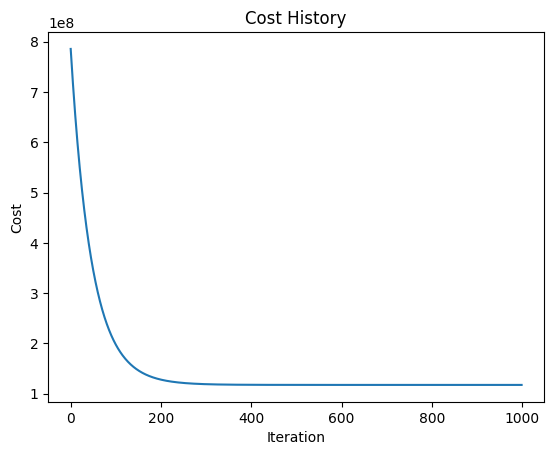

In [ ]:
# Plot the cost history
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()


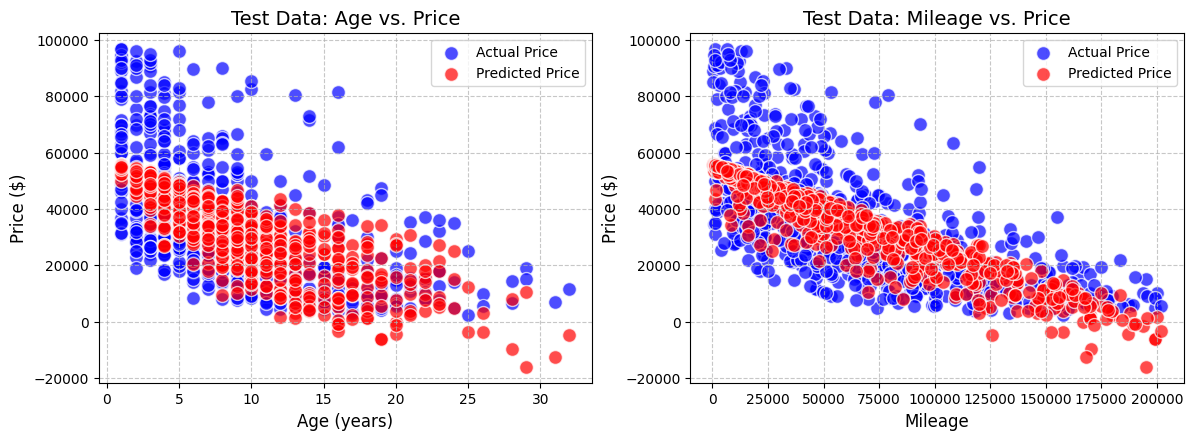

In [ ]:
# Plot the data
plt.figure(figsize=(14, 10))

# Plot 3: Test Data - Age vs. Price
plt.subplot(2, 2, 3)
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual Price', alpha=0.7, edgecolors='w', s=100)
plt.scatter(X_test[:, 0], y_pred_test, color='red', label='Predicted Price', alpha=0.7, edgecolors='w', s=100)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Test Data: Age vs. Price', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 4: Test Data - Mileage vs. Price
plt.subplot(2, 2, 4)
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual Price', alpha=0.7, edgecolors='w', s=100)
plt.scatter(X_test[:, 1], y_pred_test, color='red', label='Predicted Price', alpha=0.7, edgecolors='w', s=100)
plt.xlabel('Mileage', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Test Data: Mileage vs. Price', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


In [ ]:
# Normalize the example data
example_age = 11
example_mileage = 51000
example_age_norm = (example_age - train_mean[0]) / train_std[0]
example_mileage_norm = (example_mileage - train_mean[1]) / train_std[1]

# Make the prediction using normalized values
example_prediction = np.dot(np.array([example_age_norm, example_mileage_norm]), w) + b
print(f"Predicted price for an example with age {example_age} and mileage {example_mileage}: ${example_prediction}")


Predicted price for an example with age 11 and mileage 51000: $34100.67146483902


In [ ]:

# Calculate MAE, MSE, RMSE
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

# Training data metrics
train_mae = mae(y_train, y_pred_train)
train_mse = mse(y_train, y_pred_train)
train_rmse = rmse(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# Testing data metrics
test_mae = mae(y_test, y_pred_test)
test_mse = mse(y_test, y_pred_test)
test_rmse = rmse(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training Data - MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}")
print(f"Test Data - MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")


Training Data - MAE: 11774.77, MSE: 235214997.94, RMSE: 15336.72, R²: 0.48
Test Data - MAE: 11966.84, MSE: 237036648.74, RMSE: 15395.99, R²: 0.48


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Calculate evaluation metrics
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_pred_train)

test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training Data - MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}")
print(f"Test Data - MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")

# Example prediction
example_age = 11
example_mileage = 51000
example_features = scaler.transform([[example_mileage, example_age]])
example_prediction = model.predict(example_features)
print(f"Predicted price for an example with age {example_age} and mileage {example_mileage}: ${example_prediction[0]:.2f}")


Training Data - MAE: 4980.06, MSE: 47834032.84, RMSE: 6916.22, R²: 0.89
Test Data - MAE: 12138.24, MSE: 264541924.32, RMSE: 16264.74, R²: 0.43
Predicted price for an example with age 11 and mileage 51000: $46893.58
